In [2]:
!pip install pgmpy

  Using cached pgmpy-0.1.20-py3-none-any.whl (1.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------- 167.2/167.2 MB 10.1 MB/s eta 0:00:00


In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plttrestbps
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# Heart Dataset

Learning the Predefined Structure for heart dataset

In [421]:
G = BayesianNetwork()
nodes = ["target", "sex", "age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
G.add_nodes_from(nodes)
G.add_edges_from([("target", "chol"), 
("target", "thalach"),
("chol", "restecg"),
("thalach", "thal"), ("target", "thal"), 
("thal", "fbs"), 
("thalach", "slope"), ("target", "slope"), ("chol", "slope"), ("restecg", "slope"), 
("thalach", "oldpeak"), ("slope", "oldpeak"), 
("fbs", "age"), ("target", "age"), ("thal", "age"), ("slope", "age"), ("restecg", "age"),
("slope", "sex"),("chol", "sex"),("restecg", "sex"),
("target", "cp"),("slope", "cp"),("restecg", "cp"), 
("thalach", "ca"),("target", "ca"),("fbs", "ca"),("age", "ca"),("oldpeak", "ca"), 
("thalach", "exang"),("thal", "exang"),("target", "exang"),("fbs", "exang"),("age", "exang"),
("restecg", "exang"),("sex", "exang"),
("thalach", "trestbps"), ("target", "trestbps"), ("age", "trestbps"), ("chol", "trestbps"),
("thal", "trestbps"),("restecg", "trestbps"),("oldpeak", "trestbps"),("cp", "trestbps")])

In [422]:
import networkx as nx
import matplotlib.pyplot as plt

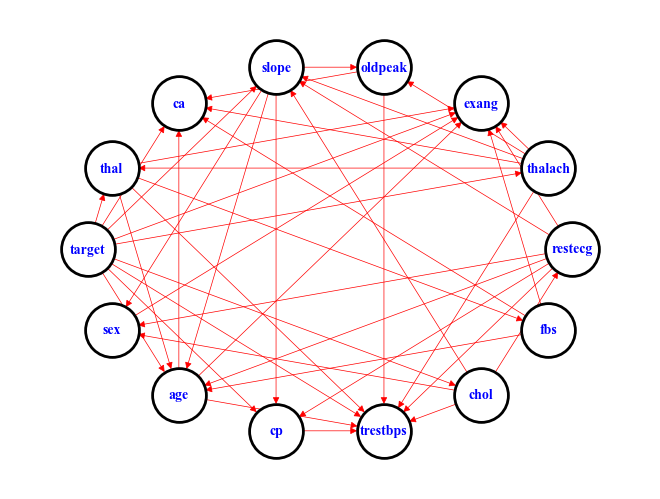

In [423]:
nx.draw_shell(G, with_labels=True,
              node_color = "white", node_size = 1500,
              font_color = "blue", font_size = 10, 
              font_family = "Times New Roman", font_weight = "bold",
              edgecolors = "black", edge_color = "red", 
              linewidths = 2, width = 0.5)
plt.margins(0.1)
plt.show()

Read the .csv files

In [424]:
train = pd.read_csv("C:\\Users\\arshh\\OneDrive\\Desktop\\AdvancedAI\\heart-stroke-data\\heart-data-discretized-train.csv")
test = pd.read_csv("C:\\Users\\arshh\\OneDrive\\Desktop\\AdvancedAI\\heart-stroke-data\\heart-data-discretized-test.csv")

In [425]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,0,0,2,0,2,2,0,3,0,3,1,0
1,1,1,0,1,1,0,0,2,0,0,2,0,3,0
2,0,0,1,1,0,0,1,4,0,0,2,0,2,1
3,3,0,0,2,2,0,0,2,1,0,1,0,3,0
4,2,0,0,4,2,0,2,1,1,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2,1,0,2,1,0,1,3,1,1,2,0,3,0
208,3,1,3,2,1,1,0,3,0,1,1,1,2,0
209,1,1,0,0,0,0,1,2,0,0,2,0,2,1
210,3,1,0,1,1,0,0,2,1,2,1,1,3,0


Spliting X_train and y_train

In [426]:
x_train = train.drop(["target"], axis = 1)
y_train = train.target

Training the Bayesian Network

In [427]:
data_train = pd.concat([x_train, y_train], axis = 1)
G.fit(data_train, estimator = MaximumLikelihoodEstimator)

In [428]:
data_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2,1,0,1,1,0,1,0,1,1,1,2,3,0
809,1,1,0,0,0,0,0,3,0,0,2,0,3,0
810,3,1,1,2,1,0,1,3,1,0,2,0,2,1
811,1,1,0,0,1,0,0,1,1,0,1,1,2,0


Spliting X_test and y_test

In [429]:
x_test = test.drop(["target"], axis = 1)
y_test = test.target

In [430]:
data_test = pd.concat([x_test, y_test], axis = 1)
y_pred = G.predict(x_test)

  0%|          | 0/162 [00:00<?, ?it/s]

In [431]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(G, data_test)
print("\n", pe.state_counts("target"))


    target
0      99
1     113


In [432]:
mle = MaximumLikelihoodEstimator(G, data_test)
print(mle.estimate_cpd("target"))

+-----------+----------+
| target(0) | 0.466981 |
+-----------+----------+
| target(1) | 0.533019 |
+-----------+----------+


Testing the Bayesian Network

In [400]:
y_prob = G.check_model()
y_prob

True

In [401]:
target_predicted_values_array = y_pred.target.values
print(f"The predicted values of target are: {target_predicted_values_array}")

y_test_array = y_test.values
print(f"The true values of target are: {y_test_array}")

The predicted values of target are: [0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
The true values of target are: [0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0]


Applying Variable Elimination

In [402]:
from pgmpy.inference import VariableElimination

In [403]:
infer = VariableElimination(G)

In [404]:
phi_query = infer.query(["target", "cp", "sex"])
phi_query

<DiscreteFactor representing phi(target:2, cp:4, sex:2) at 0x276704e4ac0>

For Probabilistic Inference

In [405]:
l = infer.query(variables = ["target"], evidence = {"sex": 1, "cp":3})

In [406]:
print(f"This is the values for P(target|gender=1, cp=4): \n{l}")

This is the values for P(target|gender=1, cp=4): 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4978 |
+-----------+---------------+
| target(1) |        0.5022 |
+-----------+---------------+


# Stroke Dataset


Learning the Predefined Structure for stroke dataset

In [358]:
F = BayesianNetwork()
nodes = ["heart_disease", "gender", "work_type", "Residence_type", "hypertension", "stroke", "age", "ever_married", "bmi", "avg_glucose_level", "smoking_status"]
F.add_nodes_from(nodes)
F .add_edges_from([("heart_disease", "gender"), 
("heart_disease", "work_type"),("heart_disease", "Residence_type"),
("heart_disease", "hypertension"), ("heart_disease", "work_type"), 
("heart_disease", "stroke"), ("hypertension", "stroke"), 
("stroke", "age"), ("hypertension", "age"), ("heart_disease", "age"),("work_type", "age"), 
("age", "ever_married"),("age", "bmi"), ("hypertension", "bmi"), ("age", "avg_glucose_level"), 
("stroke", "avg_glucose_level"), ("gender", "avg_glucose_level"),
("hypertension", "avg_glucose_level"),("heart_disease", "avg_glucose_level"),
("stroke", "smoking_status"),("heart_disease", "smoking_status"),("Residence_type", "smoking_status"),
("avg_glucose_level", "smoking_status"),("ever_married", "smoking_status"),("work_type", "smoking_status"),
("hypertension", "smoking_status"),("gender", "smoking_status"),("age", "smoking_status")])

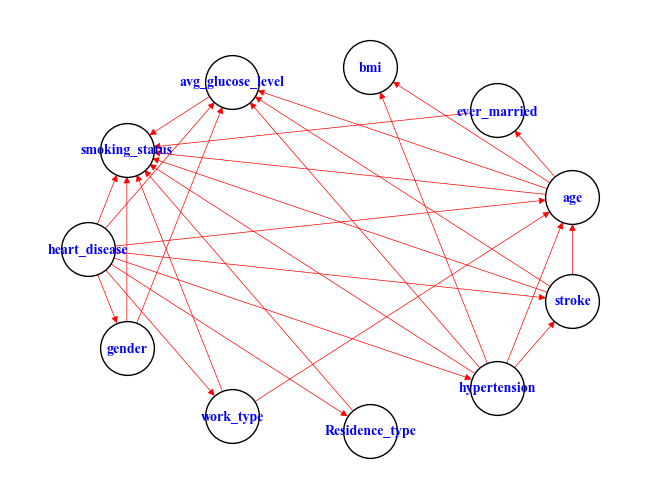

In [359]:
nx.draw_shell(F, with_labels=True,
              node_color = "white", node_size = 1500,
              font_color = "blue", font_size = 10, 
              font_family = "Times New Roman", font_weight = "bold",
              edgecolors = "black", edge_color = "red", 
              linewidths = 1, width = 0.5)
plt.margins(0.1)
plt.show()

In [360]:
training = pd.read_csv("C:\\Users\\arshh\\OneDrive\\Desktop\\AdvancedAI\\heart-stroke-data\\stroke-data-discretized-train.csv")
testing = pd.read_csv("C:\\Users\\arshh\\OneDrive\\Desktop\\AdvancedAI\\heart-stroke-data\\stroke-data-discretized-test.csv")

In [361]:
#train_x = pd.DataFrame(training)
X_train = training.drop(["stroke"], axis = 1)
y_train = training.stroke

#test_x = pd.DataFrame(testing)
X_test = testing.drop(["stroke"], axis = 1)
y_test = testing.stroke

In [363]:
#data_train

In [364]:
#Training the Bayesian Network
data_train = pd.concat([X_train, y_train], axis = 1)
F.fit(data_train, estimator = MaximumLikelihoodEstimator)
data_test = pd.concat([X_test, y_test], axis =1)
y_pred = F.predict(X_test)

  0%|          | 0/635 [00:00<?, ?it/s]

In [365]:
y_prob = F.check_model()
y_prob

True

In [374]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(F)

In [375]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(F, data_test)
print(pe.state_counts("stroke"))

heart_disease    0       1   
hypertension     0   1   0  1
stroke                       
0              799  82  32  6
1               24   8   6  2


In [376]:
mle = MaximumLikelihoodEstimator(F, data_test)
print(mle.estimate_cpd("gender"))

+----------------+---------------------+---------------------+
| heart_disease  | heart_disease(0)    | heart_disease(1)    |
+----------------+---------------------+---------------------+
| gender(Female) | 0.5958378970427163  | 0.41304347826086957 |
+----------------+---------------------+---------------------+
| gender(Male)   | 0.40416210295728366 | 0.5869565217391305  |
+----------------+---------------------+---------------------+


In [377]:
m = infer.query(variables = ["stroke"], evidence = {"gender": "Male", "age":2, "smoking_status": "formerly smoked"})

In [378]:
print(f"This is the values for P(stroke|gender=female, age = 2, smoking status= smokes): \n{m}")

This is the values for P(stroke|gender=female, age = 2, smoking status= smokes): 
+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9693 |
+-----------+---------------+
| stroke(1) |        0.0307 |
+-----------+---------------+


In [419]:
import numpy as np
from scipy.stats import norm

data = [1,2,3,4,5]
m,s = norm.fit(data)
log_likelihood = np.log(np.product(norm.pdf(data,m,s)))

In [420]:
log_likelihood

-8.827560617423226